In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14,8)
plt.style.use('fivethirtyeight')

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, auc, roc_curve, RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

import pandas_ta as ta

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=True)

import seaborn as sns
import plotly.graph_objs as go  
import yfinance as yf
import plotly.offline as pyo

pyo.init_notebook_mode(connected=True)

In [25]:
list_of_stock=pd.read_csv('DataCollection/Data/Index/nasdaq100.csv')['Symbol'].tolist()[:20]

In [35]:
data = yf.download(list_of_stock, period='5y')['Close']

[*********************100%***********************]  20 of 20 completed


In [36]:
data.normalize().iplot(kind='line')

In [37]:
data_pct = data.pct_change().dropna()

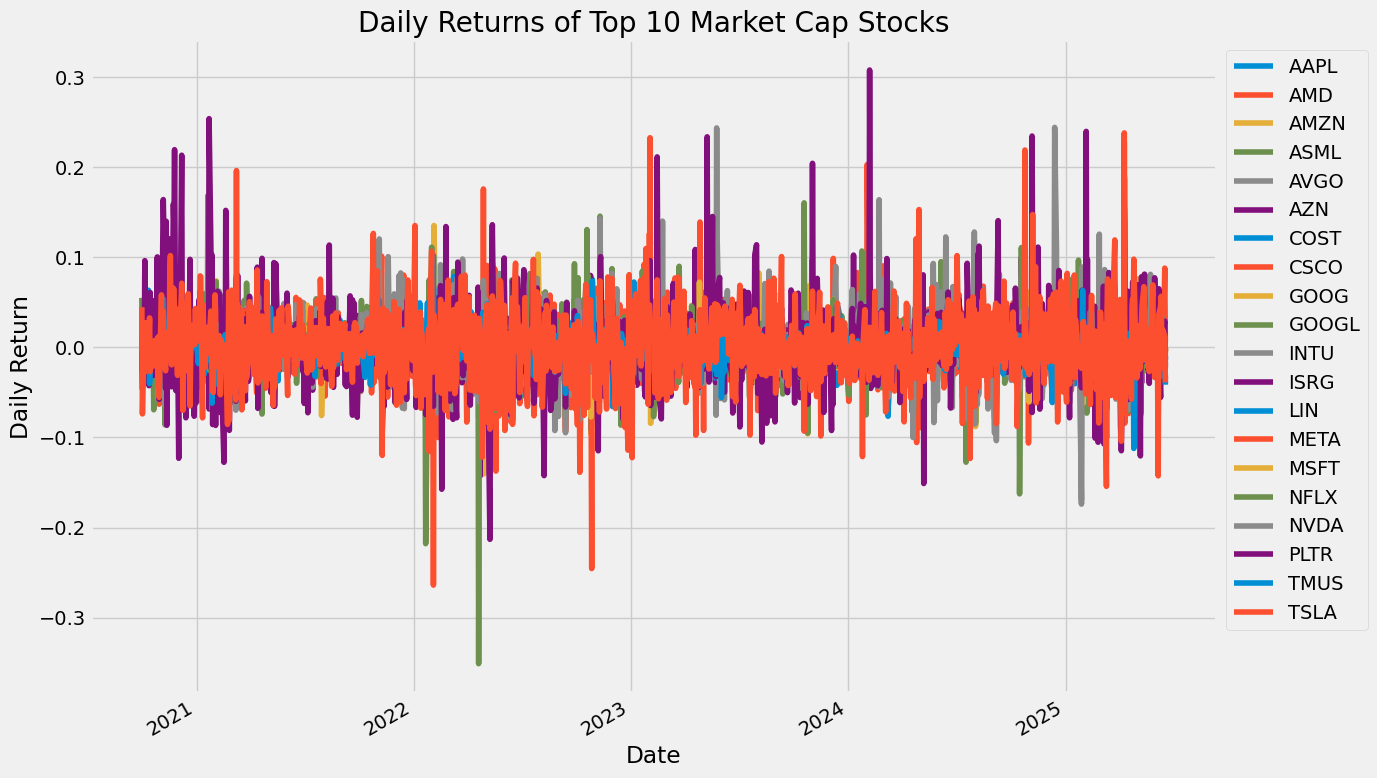

In [38]:
data_pct.plot(ax=plt.gca())
plt.title('Daily Returns of Top 10 Market Cap Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: xlabel='Ticker', ylabel='Ticker'>

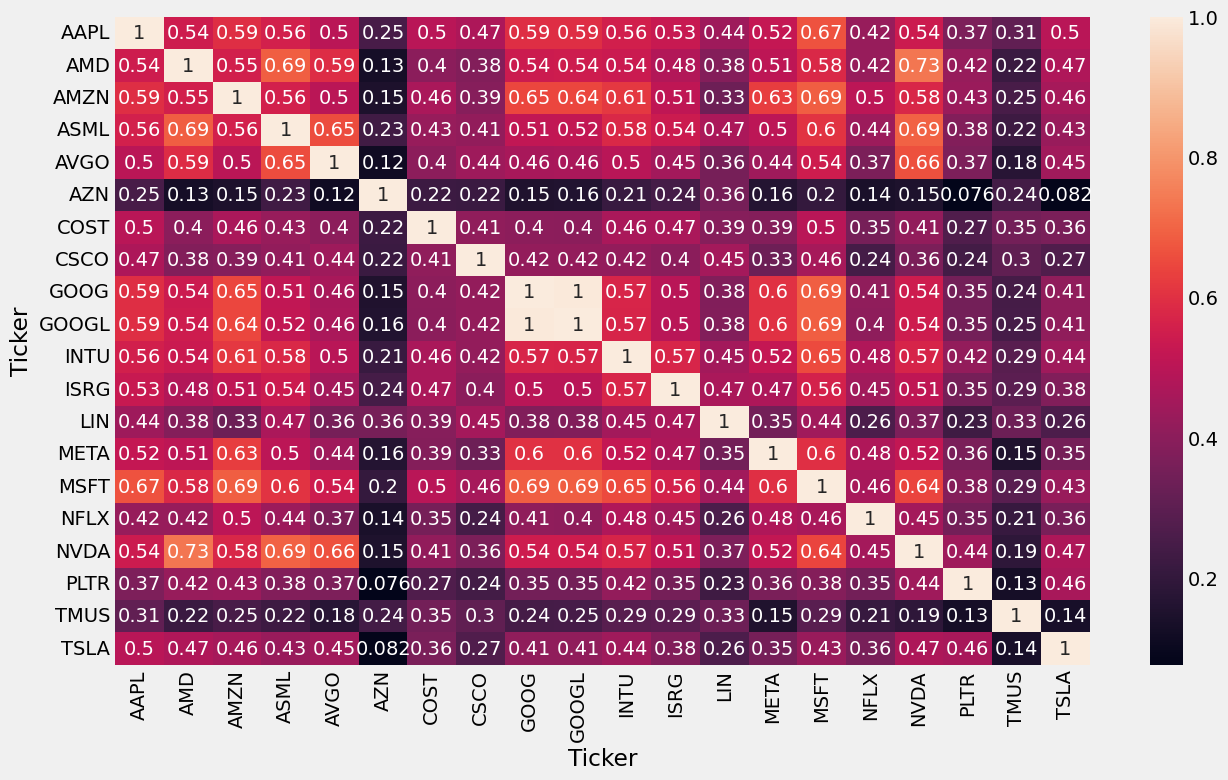

In [39]:
sns.heatmap(data_pct.corr(), annot=True)

In [40]:
fig = data_pct.iplot(kind='histogram',
          subplots=True,
          shared_xaxes=True,
          asFigure = True,
          )

for i in range(1, len(data_pct.columns) + 1):
    fig['layout'].update({f'xaxis{i}': {'range': [-0.2, 0.2]}})

pyo.iplot(fig)

In [41]:
volatility = data_pct.std() * np.sqrt(252)
print("\nAnnualized Volatility of Daily Returns:")
print(volatility.sort_values(ascending=False))


Annualized Volatility of Daily Returns:
Ticker
PLTR     0.730433
TSLA     0.619765
NVDA     0.533770
AMD      0.508351
NFLX     0.444092
META     0.442762
ASML     0.418066
AVGO     0.413025
AMZN     0.355336
INTU     0.347748
ISRG     0.332533
GOOGL    0.312320
GOOG     0.311026
AAPL     0.289153
MSFT     0.265346
TMUS     0.240605
AZN      0.238920
COST     0.229042
CSCO     0.227815
LIN      0.218842
dtype: float64


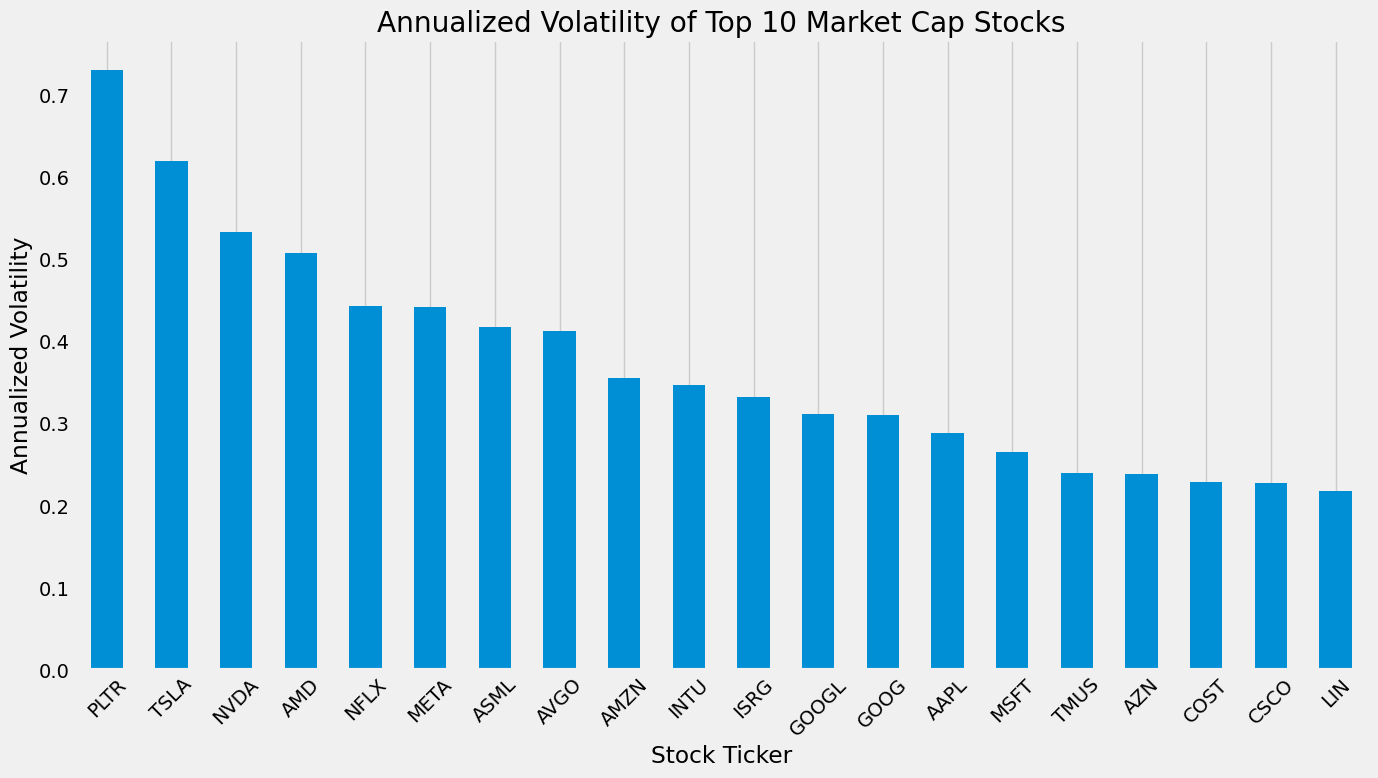

In [42]:
volatility.sort_values(ascending=False).plot(kind='bar')
plt.title('Annualized Volatility of Top 10 Market Cap Stocks')
plt.xlabel('Stock Ticker')
plt.ylabel('Annualized Volatility')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [43]:
layout = go.Layout(
        yaxis=dict(
            range=[-0.5, 0.5]
        )
    )

data_pct.iplot(kind='box', layout=layout)